In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv
/kaggle/input/heart-attack-engineered-features/__notebook_source__.ipynb
/kaggle/input/heart-attack-engineered-features/heart_attack_engineered_features.csv


# About this dataset
##### (given by 'author' of dataset)

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target/output : 0= less chance of heart attack 1= more chance of heart attack

<details>
    <summary>A different set of column descriptions(from discussion)</summary>
        
    1. age - age in years

    2. sex - sex (1 = male; 0 = female)

    3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

    5. chol - serum cholestoral in mg/dl

    6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

    7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

    8. thalach - maximum heart rate achieved

    9. exang - exercise induced angina (1 = yes; 0 = no)

    10. oldpeak - ST depression induced by exercise relative to rest

    11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

    12. ca - number of major vessels (0-3) colored by flourosopy

    13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

    14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

</details>

In [2]:
heart_data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

o2_data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")

In [3]:
heart_data.head() 
# trtbps, thalachh, chol, oldpeak, age

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data['caa'].unique()

array([0, 2, 1, 3, 4])

In [5]:
# This shows us there is no missing data in the dataset
# we can also see that all columns are numeric
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# heart_data["log"] = np.log(heart_data['age'])

# heart_data.head()

# heart_data.drop(['log'], axis=1, inplace=True)

In [7]:
summary = heart_data.describe()
summary

# df.loc[row][column]
# summary.loc['mean']['age']

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='output', ylabel='count'>

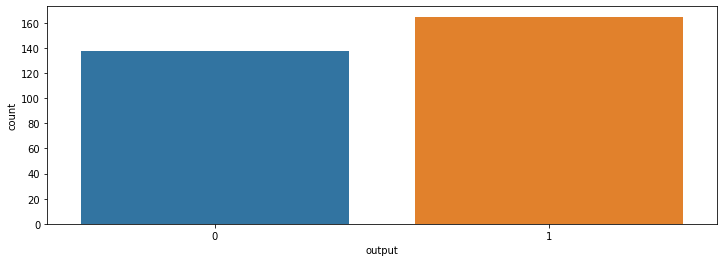

In [9]:
plt.figure(figsize=(12, 4))
sns.countplot(x='output', data = heart_data)

<AxesSubplot:xlabel='output', ylabel='count'>

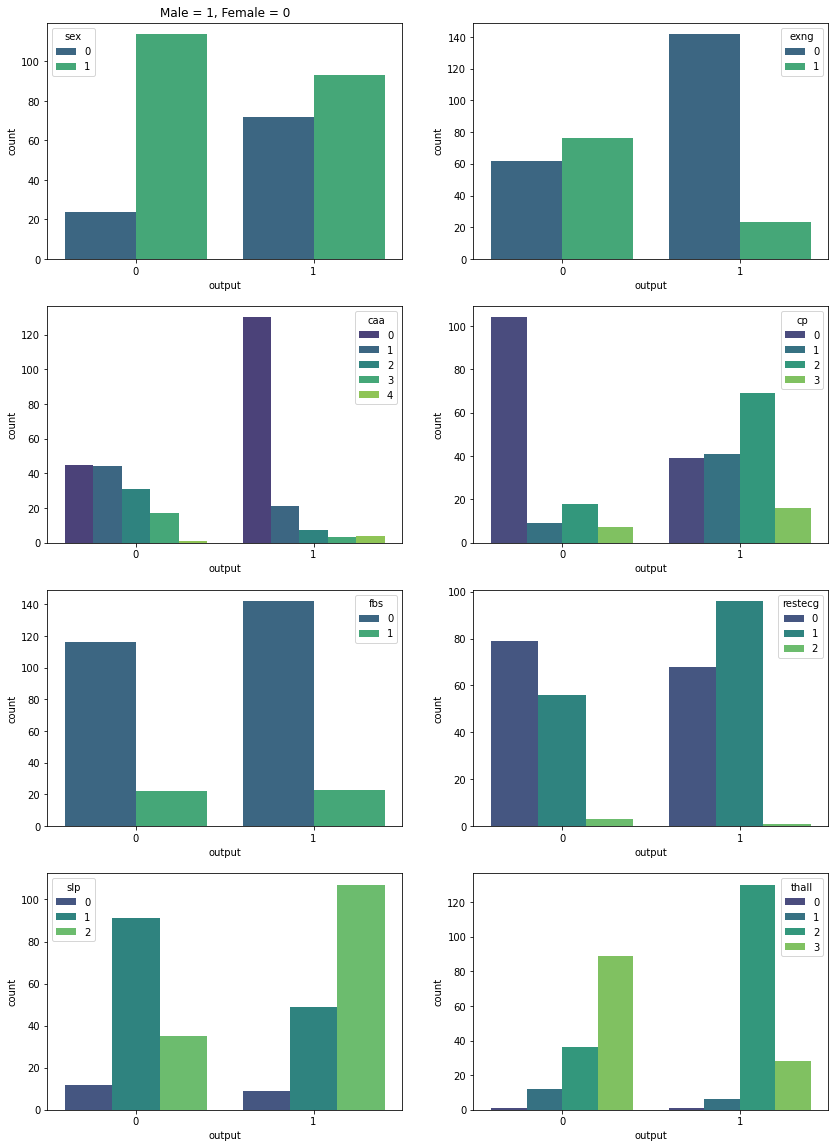

In [10]:
plt.figure(figsize=(14, 20))

# Sex, exang, ca, cp, fbs, rest_ecg

plt.subplot(4,2,1)
plt.title("Male = 1, Female = 0")
sns.countplot(x='output', hue='sex', data = heart_data, palette='viridis')

plt.subplot(4,2,2)
sns.countplot(x='output', hue='exng', data = heart_data, palette='viridis')

plt.subplot(4,2,3)
sns.countplot(x='output', hue='caa', data = heart_data, palette='viridis')

plt.subplot(4,2,4)
sns.countplot(x='output', hue='cp', data = heart_data, palette='viridis')

plt.subplot(4,2,5)
sns.countplot(x='output', hue='fbs', data = heart_data, palette='viridis')

plt.subplot(4,2,6)
sns.countplot(x='output', hue='restecg', data = heart_data, palette='viridis')

plt.subplot(4,2,7)
sns.countplot(x='output', hue='slp', data = heart_data, palette='viridis')

plt.subplot(4,2,8)
sns.countplot(x='output', hue='thall', data = heart_data, palette='viridis')

<AxesSubplot:xlabel='age', ylabel='Count'>

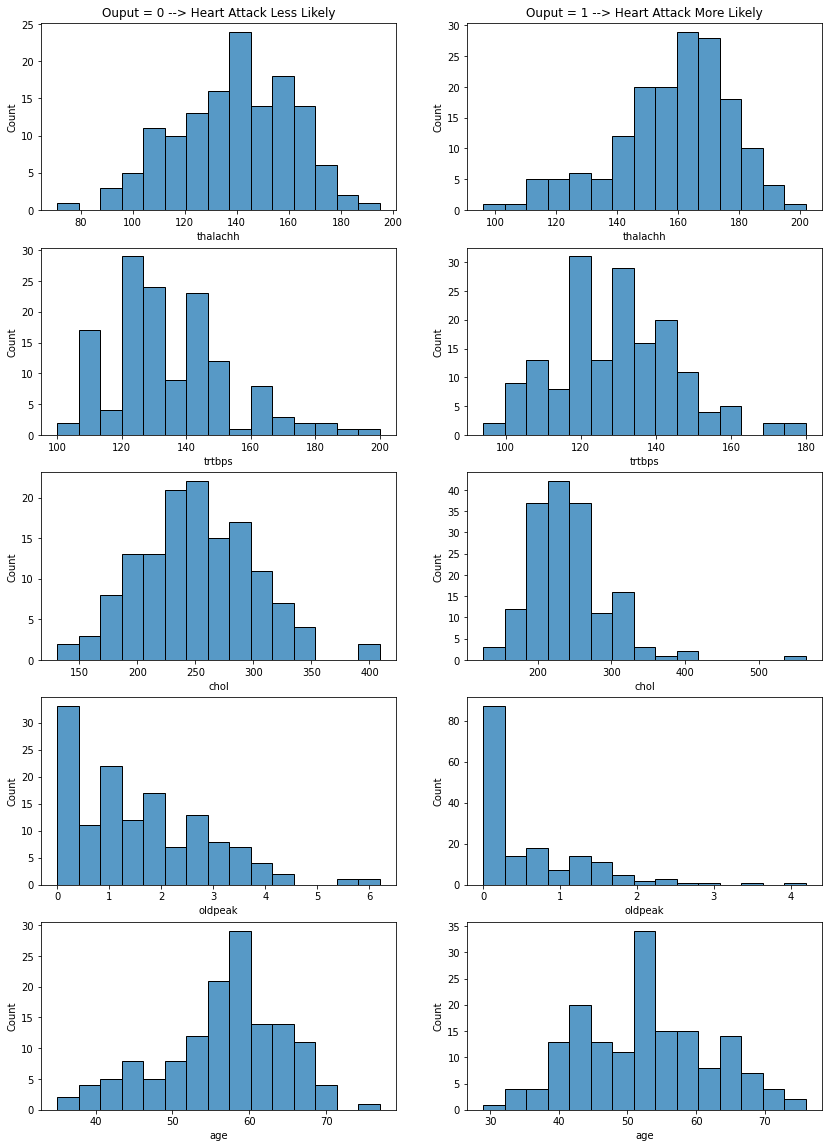

In [11]:
plt.figure(figsize=(14, 20))

# trtbps, thalachh, chol, oldpeak, age
# Check distribution of features where output = 1 vs. where output = 0
heart_data_one = heart_data[heart_data['output'] == 1]
heart_data_zero = heart_data[heart_data['output'] == 0]

plt.subplot(5,2,1)
plt.title("Ouput = 0 --> Heart Attack Less Likely")
sns.histplot(data=heart_data_zero, x="thalachh", bins=15)

plt.subplot(5,2,2)
plt.title("Ouput = 1 --> Heart Attack More Likely")
sns.histplot(data=heart_data_one, x="thalachh", bins=15)

plt.subplot(5,2,3)
sns.histplot(data=heart_data_zero, x="trtbps", bins=15)

plt.subplot(5,2,4)
sns.histplot(data=heart_data_one, x="trtbps", bins=15)

plt.subplot(5,2,5)
sns.histplot(data=heart_data_zero, x="chol", bins=15)

plt.subplot(5,2,6)
sns.histplot(data=heart_data_one, x="chol", bins=15)

plt.subplot(5,2,7)
sns.histplot(data=heart_data_zero, x="oldpeak", bins=15)

plt.subplot(5,2,8)
sns.histplot(data=heart_data_one, x="oldpeak", bins=15)

plt.subplot(5,2,9)
sns.histplot(data=heart_data_zero, x="age", bins=15)

plt.subplot(5,2,10)
sns.histplot(data=heart_data_one, x="age", bins=15)

# Feature Engineering

### Some Feature Engineering Methods
Ideas taken from this paper: [An Empirical Analysis of Feature Engineering for
Predictive Modeling](https://arxiv.org/pdf/1701.07852.pdf)

* Feature_A - Feature_B
* Feature_A + Feature_B
* Feature_A * Feature_B
* Feature_A / Feature_B
* Feature_A^2 **or** Feature_A^3 **or** sqrt(Feature_A)
* Feature_A / Feature_B^2
* (Feature_A * Feature_B) / Feature_C^2
* log(Feature_A)
* (Feature_A - Feature_B)/(Feature_C - feature_D)
* distance formula: sqrt((Feature_A - Feature_B)^2 - (Feature_C - feature_D)^2)
* Feature_A - mean_of_A **or** (Feature_A - mean_of_A)^2 **or** log(Feature_A - mean_of_A)
* sqrt((Feature_A - mean_of_A)^2/Feature_B)


In [12]:
# def minus_features(feature_a, feature_b):
#     return

# def add_features(feature_a, feature_b):
#     return

# def multiply_features(feature_a, feature_b):
#     return

# def divide_features(feature_a, feature_b):
#     return

# def distance_formula(feature_a, feature_b, feature_c, feature_d):
#     return

# def log_feature(feature_a):
#     return

# def feature_minus_mean(feature_a):
#     return

def feature_engineer(dataset, output_column):
    # initialize new pandas dataframe
    engineered_df = pd.DataFrame({"target": output_column})
    
    summary_df = dataset.describe()
    
    columns = list(dataset.columns.values)
    for feature_a in columns:
        feature_a_mean = dataset[feature_a].mean()

        engineered_df["log_" + feature_a] = np.log(dataset[feature_a])

        engineered_df["squared_" + feature_a] = (dataset[feature_a])**2

        engineered_df["cubed_" + feature_a] = (dataset[feature_a])**3

        engineered_df[feature_a + "_minus_mean"] = dataset[feature_a] - feature_a_mean
        
        engineered_df["sqrt_" + feature_a] = (dataset[feature_a])**0.5
    
    for a in columns:
        mean_of_a = dataset[a].mean()
        for b in columns:
            if b != a:
                
                engineered_df[a + "_minus_" + b] = dataset[a] - dataset[b]
                
                engineered_df[a + "_plus_" + b] = dataset[a] + dataset[b]
                
                engineered_df[a + "_times_" + b] = dataset[a] * dataset[b]
                
                engineered_df[a + "_divided_by_" + b] = dataset[a] / dataset[b]
                
                engineered_df[a + "_std_dev_type_ratio_" + b] = np.sqrt(((dataset[a] - mean_of_a)**2) / dataset[b])
                
                engineered_df[a + "_divided_by_" + b + "_squared"] = dataset[a] / (dataset[b]**2)
                
    for a in columns:
        mean_of_a = dataset[a].mean()
        for b in columns:
            mean_of_b = dataset[b].mean()
            if b != a:
                for c in columns:
                    if c != a and c != b:
                        engineered_df[a + "_times_" + b + "_divided_by_" + c + "_squared"] = (dataset[a] * dataset[b]) / (dataset[c]**2)
                    
                    for d in columns:
                        if d != a and d != b and d != c:
                            a_minus_b = dataset[a] - dataset[b]
                            c_minus_d = dataset[c] - dataset[d]
                            
                            engineered_df[a + "_minus_" + b + "_divided_by_" + c + "_minus_" + d] = (a_minus_b) / (c_minus_d)
                            
                            engineered_df[a + "_" + b + "_" + c + "_" + d + "_distance_formula"] = np.sqrt((a_minus_b**2) / (c_minus_d**2))
    
    engineered_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    return engineered_df

In [13]:
# creating "engineered_data"
# engineered_data = feature_engineer(heart_data.drop(columns = ["output"]), 
#                                    heart_data["output"])

In [14]:
# code for saving engineered_data as output file
# engineered_data.to_csv('heart_attack_engineered_features.csv', index=False)

# instead of creating it every time, I've saved it and imported it here
# creating the dataset takes very long
engineered_data = pd.read_csv("../input/heart-attack-engineered-features/heart_attack_engineered_features.csv")

In [15]:
# engineered_data.iloc[0]['output_divided_by_caa']
engineered_data.head()

,target,log_age,squared_age,cubed_age,age_minus_mean,sqrt_age,log_sex,squared_sex,cubed_sex,sex_minus_mean,...,thall_minus_caa_divided_by_thall_minus_restecg,thall_caa_thall_restecg_distance_formula,thall_minus_caa_divided_by_thall_minus_thalachh,thall_caa_thall_thalachh_distance_formula,thall_minus_caa_divided_by_thall_minus_exng,thall_caa_thall_exng_distance_formula,thall_minus_caa_divided_by_thall_minus_oldpeak,thall_caa_thall_oldpeak_distance_formula,thall_minus_caa_divided_by_thall_minus_slp,thall_caa_thall_slp_distance_formula
0,1,4.143135,3969,250047,8.633663,7.937254,0.0,1,1,0.316832,...,1.0,1.0,-0.006711,0.006711,1.0,1.0,-0.769231,0.769231,1.0,1.0
1,1,3.610918,1369,50653,-17.366337,6.082763,0.0,1,1,0.316832,...,2.0,2.0,-0.010811,0.010811,1.0,1.0,-1.333333,1.333333,1.0,1.0
2,1,3.713572,1681,68921,-13.366337,6.403124,NaN,0,0,-0.683168,...,1.0,1.0,-0.011765,0.011765,1.0,1.0,3.333333,3.333333,NaN,NaN
3,1,4.025352,3136,175616,1.633663,7.483315,0.0,1,1,0.316832,...,2.0,2.0,-0.011364,0.011364,1.0,1.0,1.666667,1.666667,NaN,NaN
4,1,4.043051,3249,185193,2.633663,7.549834,NaN,0,0,-0.683168,...,2.0,2.0,-0.012422,0.012422,2.0,2.0,1.428571,1.428571,NaN,NaN


In [16]:
engineered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Columns: 43902 entries, target to thall_caa_thall_slp_distance_formula
dtypes: float64(43481), int64(421)
memory usage: 101.5 MB


In [17]:
# drop columns where NaN percentage is above 80%
# engineered_data = engineered_data.loc[:, engineered_data.isnull().sum() < 0.8*engineered_data.shape[0]]

# drop columns with any NaN values (these are columns where we divided by zero or has a log of 1 at some point)
engineered_data = engineered_data.loc[:, engineered_data.isnull().sum() == 0]

In [18]:
engineered_data.head()

,target,log_age,squared_age,cubed_age,age_minus_mean,sqrt_age,squared_sex,cubed_sex,sex_minus_mean,sqrt_sex,...,thall_minus_caa_divided_by_caa_minus_thalachh,thall_caa_caa_thalachh_distance_formula,thall_minus_caa_divided_by_thall_minus_age,thall_caa_thall_age_distance_formula,thall_minus_caa_divided_by_thall_minus_trtbps,thall_caa_thall_trtbps_distance_formula,thall_minus_caa_divided_by_thall_minus_chol,thall_caa_thall_chol_distance_formula,thall_minus_caa_divided_by_thall_minus_thalachh,thall_caa_thall_thalachh_distance_formula
0,1,4.143135,3969,250047,8.633663,7.937254,1,1,0.316832,1.0,...,-0.006667,0.006667,-0.016129,0.016129,-0.006944,0.006944,-0.004310,0.004310,-0.006711,0.006711
1,1,3.610918,1369,50653,-17.366337,6.082763,1,1,0.316832,1.0,...,-0.010695,0.010695,-0.057143,0.057143,-0.015625,0.015625,-0.008065,0.008065,-0.010811,0.010811
2,1,3.713572,1681,68921,-13.366337,6.403124,0,0,-0.683168,0.0,...,-0.011628,0.011628,-0.051282,0.051282,-0.015625,0.015625,-0.009901,0.009901,-0.011765,0.011765
3,1,4.025352,3136,175616,1.633663,7.483315,1,1,0.316832,1.0,...,-0.011236,0.011236,-0.037037,0.037037,-0.016949,0.016949,-0.008547,0.008547,-0.011364,0.011364
4,1,4.043051,3249,185193,2.633663,7.549834,0,0,-0.683168,0.0,...,-0.012270,0.012270,-0.036364,0.036364,-0.016949,0.016949,-0.005682,0.005682,-0.012422,0.012422


### Picking the Best of the Features we just Created

In [19]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(engineered_data.drop(columns=['target']),
                                                    engineered_data['target'], 
                                                    test_size=0.5, 
                                                    random_state=125)

#### Optimizing the Random Forest Classifier

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [22]:
# # model = RandomForestRegressor()
# model = RandomForestClassifier()

In [23]:
param_grid = {'max_depth': [10,20,30,40,50],
             'n_estimators': [100,200,300,400,500],
             #'min_samples_leaf':[100,200,300],
             #'min_sample_split':[500,600,700],
             'max_leaf_nodes':[5,10,20]}

In [24]:
# grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error', cv=10)

In [25]:
# %%time
# grid.fit(X_train, y_train)

In [26]:
# grid.best_params_

##### Best Parameters

**----- First iteration -----**

Note: grid.fit() took 39min 34s to run

given by grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 100,
 'n_estimators': 200}
 
 **Note:** adding in "min_samples_leaf" drove feature importance of all features to zero for some reason.
 
 **----- Second iteration -----**
 
 Note: grid.fit() took 25min 12s
 
 given by grid.best_params_
 
 {'max_depth': 50, 
  'max_leaf_nodes': 20, 
  'n_estimators': 100}


--------------------- END OF PARAMETER OPTIMIZATION ---------------------------------

In [27]:
# model = RandomForestClassifier(max_depth=10, 
#                                max_leaf_nodes=5,
#                                n_estimators=200)
#                                min_samples_leaf=50)#, 
#                                n_estimators=50)

model = RandomForestClassifier(max_depth=50, 
                               max_leaf_nodes=20,
                               n_estimators=100)

# model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_leaf_nodes=20)

In [28]:
importance = model.feature_importances_

<AxesSubplot:>

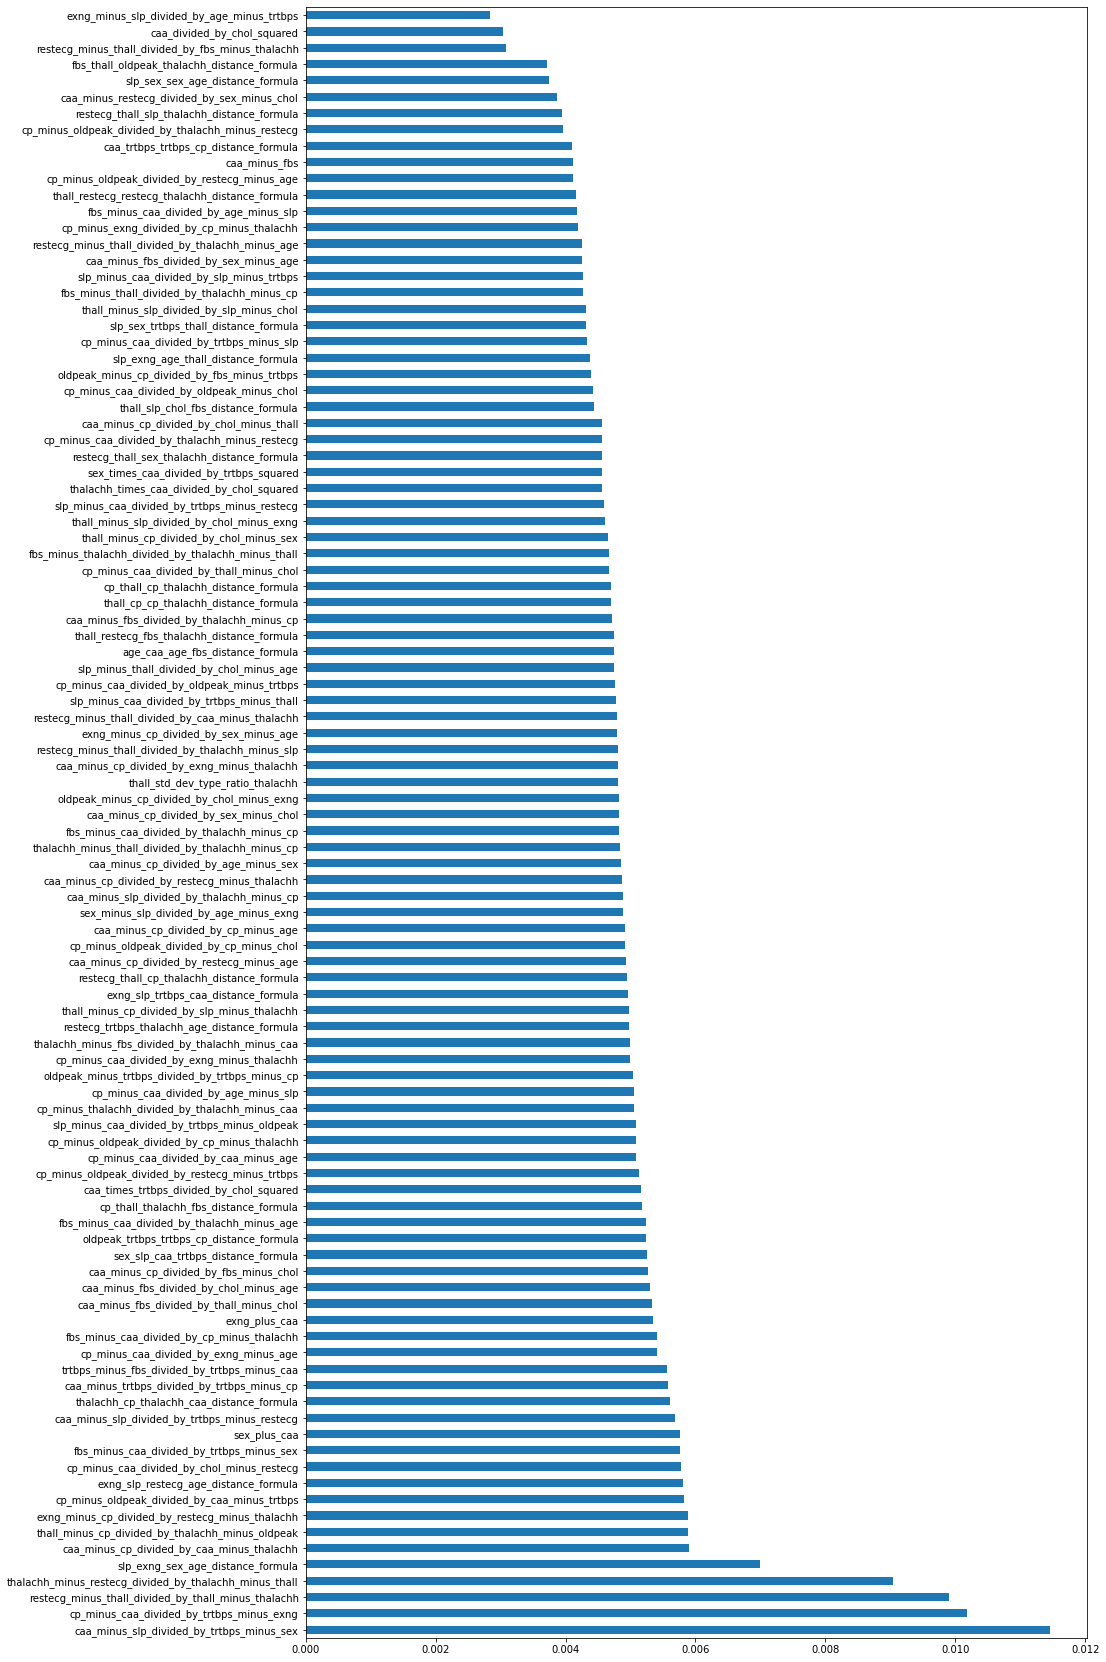

In [29]:
# plotting the features with the highest importance score
plt.figure(figsize=(14, 30))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(100).plot(kind='barh')

In [30]:
feat_importances.nlargest(100)

caa_minus_slp_divided_by_trtbps_minus_sex                 0.011454
cp_minus_caa_divided_by_trtbps_minus_exng                 0.010174
restecg_minus_thall_divided_by_thall_minus_thalachh       0.009903
thalachh_minus_restecg_divided_by_thalachh_minus_thall    0.009048
slp_exng_sex_age_distance_formula                         0.007001
                                                            ...   
slp_sex_sex_age_distance_formula                          0.003753
fbs_thall_oldpeak_thalachh_distance_formula               0.003721
restecg_minus_thall_divided_by_fbs_minus_thalachh         0.003091
caa_divided_by_chol_squared                               0.003035
exng_minus_slp_divided_by_age_minus_trtbps                0.002845
Length: 100, dtype: float64

In [31]:
feat_importances.sum()

1.0

In [32]:
list_of_top_features = feat_importances.nlargest(100).index.tolist()

list_of_top_features

['caa_minus_slp_divided_by_trtbps_minus_sex',
 'cp_minus_caa_divided_by_trtbps_minus_exng',
 'restecg_minus_thall_divided_by_thall_minus_thalachh',
 'thalachh_minus_restecg_divided_by_thalachh_minus_thall',
 'slp_exng_sex_age_distance_formula',
 'caa_minus_cp_divided_by_caa_minus_thalachh',
 'thall_minus_cp_divided_by_thalachh_minus_oldpeak',
 'exng_minus_cp_divided_by_restecg_minus_thalachh',
 'cp_minus_oldpeak_divided_by_caa_minus_trtbps',
 'exng_slp_restecg_age_distance_formula',
 'cp_minus_caa_divided_by_chol_minus_restecg',
 'fbs_minus_caa_divided_by_trtbps_minus_sex',
 'sex_plus_caa',
 'caa_minus_slp_divided_by_trtbps_minus_restecg',
 'thalachh_cp_thalachh_caa_distance_formula',
 'caa_minus_trtbps_divided_by_trtbps_minus_cp',
 'trtbps_minus_fbs_divided_by_trtbps_minus_caa',
 'cp_minus_caa_divided_by_exng_minus_age',
 'fbs_minus_caa_divided_by_cp_minus_thalachh',
 'exng_plus_caa',
 'caa_minus_fbs_divided_by_thall_minus_chol',
 'caa_minus_fbs_divided_by_chol_minus_age',
 'caa_minus

In [33]:
top_engineered_features = engineered_data[list_of_top_features]

In [34]:
top_engineered_features.head()

,caa_minus_slp_divided_by_trtbps_minus_sex,cp_minus_caa_divided_by_trtbps_minus_exng,restecg_minus_thall_divided_by_thall_minus_thalachh,thalachh_minus_restecg_divided_by_thalachh_minus_thall,slp_exng_sex_age_distance_formula,caa_minus_cp_divided_by_caa_minus_thalachh,thall_minus_cp_divided_by_thalachh_minus_oldpeak,exng_minus_cp_divided_by_restecg_minus_thalachh,cp_minus_oldpeak_divided_by_caa_minus_trtbps,exng_slp_restecg_age_distance_formula,...,caa_minus_fbs,caa_trtbps_trtbps_cp_distance_formula,cp_minus_oldpeak_divided_by_thalachh_minus_restecg,restecg_thall_slp_thalachh_distance_formula,caa_minus_restecg_divided_by_sex_minus_chol,slp_sex_sex_age_distance_formula,fbs_thall_oldpeak_thalachh_distance_formula,restecg_minus_thall_divided_by_fbs_minus_thalachh,caa_divided_by_chol_squared,exng_minus_slp_divided_by_age_minus_trtbps
0,0.000000,0.020690,0.006711,1.006711,0.000000,0.020000,-0.013541,0.020000,-0.004828,0.000000,...,-1,1.021127,0.004667,0.006667,-0.000000,0.016129,0.000000,0.006711,0.0,-0.000000
1,0.000000,0.015385,0.005405,1.005405,0.000000,0.010695,0.000000,0.010753,0.011538,0.000000,...,0,1.015625,-0.008065,0.005348,0.004016,0.027778,0.010899,0.005348,0.0,-0.000000
2,-0.015385,0.007692,0.011765,1.011765,0.048780,0.005814,0.005862,0.005814,0.003077,0.048780,...,0,1.007752,-0.002326,0.011765,-0.000000,0.048780,0.011723,0.011628,0.0,0.022472
3,-0.016807,0.008333,0.005682,1.005682,0.036364,0.005618,0.005643,0.005650,-0.001667,0.036364,...,0,1.008403,0.001130,0.005682,0.004255,0.018182,0.011287,0.005618,0.0,0.031250
4,-0.016667,0.000000,0.006211,1.006211,0.017544,-0.000000,0.012315,-0.006173,0.005000,0.017857,...,0,1.000000,-0.003704,0.006211,0.002825,0.035088,0.012315,0.006135,0.0,0.015873


In [35]:
top_engineered_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 100 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   caa_minus_slp_divided_by_trtbps_minus_sex               303 non-null    float64
 1   cp_minus_caa_divided_by_trtbps_minus_exng               303 non-null    float64
 2   restecg_minus_thall_divided_by_thall_minus_thalachh     303 non-null    float64
 3   thalachh_minus_restecg_divided_by_thalachh_minus_thall  303 non-null    float64
 4   slp_exng_sex_age_distance_formula                       303 non-null    float64
 5   caa_minus_cp_divided_by_caa_minus_thalachh              303 non-null    float64
 6   thall_minus_cp_divided_by_thalachh_minus_oldpeak        303 non-null    float64
 7   exng_minus_cp_divided_by_restecg_minus_thalachh         303 non-null    float64
 8   cp_minus_oldpeak_divided_by_caa_minus_t

# Combine Engineered Features with Original Dataset

###### just moving 'output' column to the front of the dataframe first

In [36]:
# get a list of columns
# print(heart_data.columns.tolist())

# old order --> "output" at end
# ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

# move "output" to front
new_column_order = ['output', 'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
heart_data = heart_data[new_column_order]

In [37]:
heart_data.head()

,output,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2


###### Combining *heart_data* dataframe with *top_engineered_features* dataframe

In [38]:
heart_data_engineered = pd.concat([heart_data, top_engineered_features], axis=1)

In [39]:
heart_data_engineered.head()

,output,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,...,caa_minus_fbs,caa_trtbps_trtbps_cp_distance_formula,cp_minus_oldpeak_divided_by_thalachh_minus_restecg,restecg_thall_slp_thalachh_distance_formula,caa_minus_restecg_divided_by_sex_minus_chol,slp_sex_sex_age_distance_formula,fbs_thall_oldpeak_thalachh_distance_formula,restecg_minus_thall_divided_by_fbs_minus_thalachh,caa_divided_by_chol_squared,exng_minus_slp_divided_by_age_minus_trtbps
0,1,63,1,3,145,233,1,0,150,0,...,-1,1.021127,0.004667,0.006667,-0.000000,0.016129,0.000000,0.006711,0.0,-0.000000
1,1,37,1,2,130,250,0,1,187,0,...,0,1.015625,-0.008065,0.005348,0.004016,0.027778,0.010899,0.005348,0.0,-0.000000
2,1,41,0,1,130,204,0,0,172,0,...,0,1.007752,-0.002326,0.011765,-0.000000,0.048780,0.011723,0.011628,0.0,0.022472
3,1,56,1,1,120,236,0,1,178,0,...,0,1.008403,0.001130,0.005682,0.004255,0.018182,0.011287,0.005618,0.0,0.031250
4,1,57,0,0,120,354,0,1,163,1,...,0,1.000000,-0.003704,0.006211,0.002825,0.035088,0.012315,0.006135,0.0,0.015873


In [40]:
heart_data_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Columns: 114 entries, output to exng_minus_slp_divided_by_age_minus_trtbps
dtypes: float64(98), int64(16)
memory usage: 270.0 KB


### ✔ Dataset is now ready for modelling ✔

In [41]:
heart_data_engineered.to_csv('heart_attack_engineered_dataset_1.csv', index=False)